### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

Running concept drift simulation tests...
Passed invalid n_periods test: n_periods must be positive.
Passed invalid samples_per_period test: samples_per_period must be positive.
Passed invalid drift_start test: drift_start must be >= 0 and less than n_periods.
Passed drift_start == n_periods test: drift_start must be >= 0 and less than n_periods.
Sample of simulated data:
   period  target
0       0       0
1       0       1
2       0       1
3       0       0
4       0       0


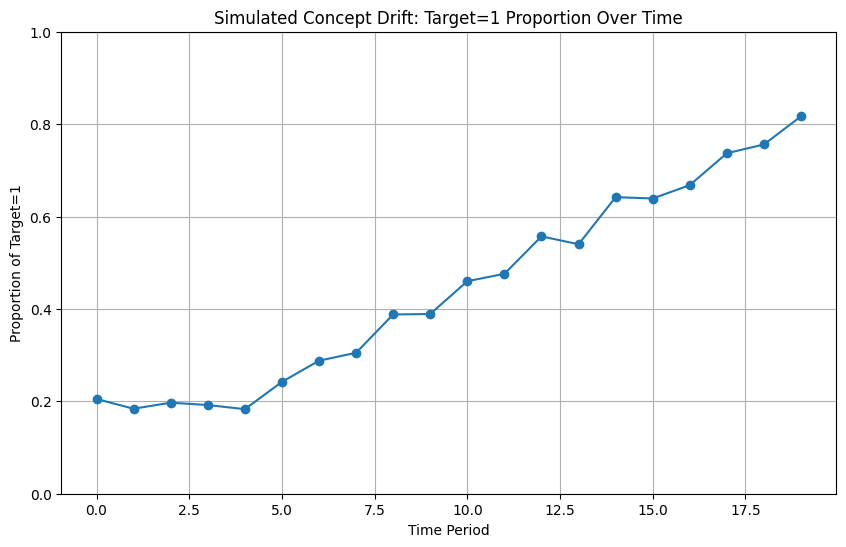

Tests completed.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_concept_drift(n_periods=20, samples_per_period=1000, drift_start=5):
    """
    Simulate binary target distribution drift over time.

    Parameters:
        n_periods (int): Number of time periods to simulate, must be > 0
        samples_per_period (int): Number of samples per period, must be > 0
        drift_start (int): Period index where drift starts, must be >=0 and < n_periods

    Returns:
        pd.DataFrame: Columns ['period', 'target'] with simulated data

    Raises:
        ValueError: If input parameters are invalid
    """

    # Validate input parameters
    if not all(isinstance(x, int) for x in [n_periods, samples_per_period, drift_start]):
        raise ValueError("All input parameters should be integers.")
    if n_periods <= 0:
        raise ValueError("n_periods must be positive.")
    if samples_per_period <= 0:
        raise ValueError("samples_per_period must be positive.")
    if drift_start < 0 or drift_start >= n_periods:
        raise ValueError("drift_start must be >= 0 and less than n_periods.")

    periods = []
    targets = []

    initial_prob = 0.2  # initial probability of target=1 before drift
    final_prob = 0.8    # final probability of target=1 after full drift
    drift_duration = n_periods - drift_start
    prob_increment = (final_prob - initial_prob) / drift_duration if drift_duration > 0 else 0

    for period in range(n_periods):
        if period < drift_start:
            p = initial_prob
        else:
            # linearly increase probability after drift_start
            p = initial_prob + (period - drift_start + 1) * prob_increment

        # Clip probability to max final_prob to avoid overshoot due to rounding
        p = min(p, final_prob)

        targets_period = np.random.binomial(1, p, size=samples_per_period)
        periods.extend([period] * samples_per_period)
        targets.extend(targets_period)

    df = pd.DataFrame({'period': periods, 'target': targets})
    return df

def plot_concept_drift(df):
    if df is None or df.empty:
        print("No data to plot.")
        return

    drift_summary = df.groupby('period')['target'].mean()

    plt.figure(figsize=(10,6))
    plt.plot(drift_summary.index, drift_summary.values, marker='o', linestyle='-')
    plt.title('Simulated Concept Drift: Target=1 Proportion Over Time')
    plt.xlabel('Time Period')
    plt.ylabel('Proportion of Target=1')
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

def test_simulation():
    print("Running concept drift simulation tests...")

    # Test valid parameters
    df = simulate_concept_drift()
    assert df is not None and not df.empty, "Simulation failed: empty DataFrame"
    assert 'period' in df.columns and 'target' in df.columns, "Missing required columns"
    assert df['target'].isin([0,1]).all(), "Target contains non-binary values"

    # Test parameter validation
    try:
        simulate_concept_drift(n_periods=-1)
    except ValueError as e:
        print(f"Passed invalid n_periods test: {e}")

    try:
        simulate_concept_drift(samples_per_period=0)
    except ValueError as e:
        print(f"Passed invalid samples_per_period test: {e}")

    try:
        simulate_concept_drift(drift_start=20)
    except ValueError as e:
        print(f"Passed invalid drift_start test: {e}")

    try:
        simulate_concept_drift(n_periods=10, drift_start=10)
    except ValueError as e:
        print(f"Passed drift_start == n_periods test: {e}")

    print("Sample of simulated data:")
    print(df.head())

    plot_concept_drift(df)
    print("Tests completed.\n")

if __name__ == "__main__":
    test_simulation()

Running concept drift simulation test...
Sample data:
   period  target
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0


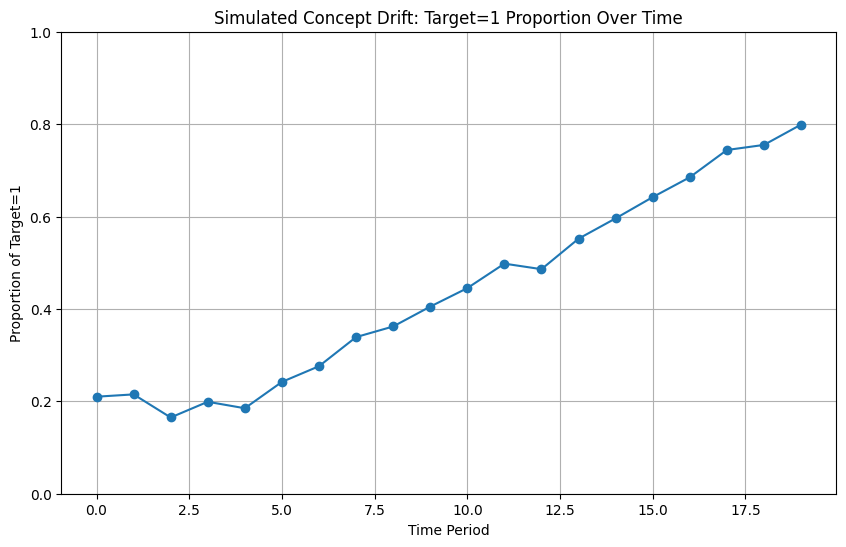

Test completed.



In [ ]:
# write your code from here  

import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt

def simulate_concept_drift(n_periods=20, samples_per_period=1000, drift_start=5):
    """
    Simulate binary target distribution drift over time.
    
    Parameters:
        n_periods (int): Number of time periods to simulate
        samples_per_period (int): Number of samples per period
        drift_start (int): Period at which drift starts
    
    Returns:
        DataFrame with columns ['period', 'target']
    """
    periods = []
    targets = []

    for period in range(n_periods):
        # Before drift, target=1 probability is 0.2
        if period < drift_start:
            p = 0.2
        else:
            # After drift, gradually increase probability up to 0.8
            p = 0.2 + (period - drift_start + 1) * (0.6 / (n_periods - drift_start))

        # Generate binary targets with probability p
        targets_period = np.random.binomial(1, p, size=samples_per_period)
        periods.extend([period] * samples_per_period)
        targets.extend(targets_period)

    df = pd.DataFrame({'period': periods, 'target': targets})
    return df

def plot_concept_drift(df):
    if df is None or df.empty:
        print("No data to plot.")
        return

    # Calculate proportion of target=1 in each period
    drift_summary = df.groupby('period')['target'].mean()

    plt.figure(figsize=(10,6))
    plt.plot(drift_summary.index, drift_summary.values, marker='o', linestyle='-')
    plt.title('Simulated Concept Drift: Target=1 Proportion Over Time')
    plt.xlabel('Time Period')
    plt.ylabel('Proportion of Target=1')
    plt.grid(True)
    plt.ylim(0,1)
    plt.show()

def test_simulation():
    print("Running concept drift simulation test...")
    df = simulate_concept_drift()
    assert df is not None and not df.empty, "Simulation failed, empty DataFrame"
    assert 'period' in df.columns and 'target' in df.columns, "Missing columns in data"
    assert df['target'].isin([0,1]).all(), "Target contains non-binary values"

    print("Sample data:")
    print(df.head())

    plot_concept_drift(df)
    print("Test completed.\n")

if __name__ == "__main__":
    test_simulation()